# This is a the All Sky Simulation for Planet Host Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

# Star Selection Rules
- Select stars from Barclay et al. 2018 as planet hosts
- Fill in the rest of the targets with the top 400,000 stars from CTL 6.2 This is an estimate of the number of 2-min cadence stars.
- H >= 7 to avoid saturation
- H < 12 to keep the number of exposures down.

## History
- New in Gamma-2-yso
   - No changes with respect to Gamma-2-cad_match
- New in Gamma-2-cad_match
   - Delta_max = 3000
- New in Gamma-0
    - Altered the cadences, so that back to back exposures are allowed 

## Select simulated planet hosts from Barclay et al. 2018
http://adsabs.harvard.edu/abs/2018ApJS..239....2B

In [2]:
ver = 'gamma-2-yso'
planets_tab = Table.read('workspace/target_files/Planet/{}/datafileBarclayTESS.txt'.format(ver)
                         ,format='cds',data_start=1)
print(planets_tab.columns)

planets_tab['TICID'] = np.array(planets_tab['TICID'],dtype='int32')
planets_tab['RAdeg'] = np.array(planets_tab['RAdeg'],dtype='float64')*u.deg
planets_tab['DEdeg'] = np.array(planets_tab['DEdeg'],dtype='float64')*u.deg
planets_tab['ELON'] = np.array(planets_tab['ELON'],dtype='float64')*u.deg
planets_tab['ELAT'] = np.array(planets_tab['ELAT'],dtype='float64')*u.deg
planets_tab['2min-target'] = np.array(planets_tab['2min-target'],dtype='bool')
planets_tab

<TableColumns names=('TICID','RAdeg','DEdeg','ELON','ELAT','Priority','2min-target','Camera','Obslen','Num-sectors','Vmag','Kmag','Jmag','Tmag','Star-radius','Star-mass','Star-teff','Distance','Subgiant','Detected','Detected-cons','Planet-period','Planet-radius','Ntransits','Ars','Ecc','Rprs','Impact','Duration','Depth-obs','Insol','Noise-level','SNR')>


TICID,RAdeg,DEdeg,ELON,ELAT,Priority,2min-target,Camera,Obslen,Num-sectors,Vmag,Kmag,Jmag,Tmag,Star-radius,Star-mass,Star-teff,Distance,Subgiant,Detected,Detected-cons,Planet-period,Planet-radius,Ntransits,Ars,Ecc,Rprs,Impact,Duration,Depth-obs,Insol,Noise-level,SNR
,deg,deg,deg,deg,,,,d,,mag,mag,mag,mag,Rsun,Msun,K,pc,,,,d,Rgeo,,,,,,h,1e-06,,1e-06,
int32,float64,float64,float64,float64,float64,bool,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3898497,11.4122,-9.906003,6.522472,-13.61342,0.00169365501283,False,1,27.4,1,13.362,10.053,10.849,11.862,1.342,0.647,4134.0,--,1,1,1,2.200244,13.598,13,4.59,0.016195,0.092756,0.715,3.083,8519.908,578.391,568.632,94.86
3958932,12.52727,-6.747038,8.847222,-11.15556,0.000948932109741,False,1,27.4,1,13.226,10.978,11.487,12.18,0.867,0.841,5046.0,--,0,1,0,11.822694,10.716,2,23.783,0.126516,0.113124,0.096,4.213,12720.188,47.811,696.823,52.988
40081742,6.989876,-11.87873,1.614796,-13.66389,0.00101901163469,False,1,27.4,1,12.994,10.888,11.394,12.097,0.86,0.834,5021.0,--,0,1,1,6.995948,12.565,4,16.862,0.043151,0.133794,0.327,3.444,17900.78,93.242,660.291,100.628
10506521,28.62281,64.79316,55.6538,48.50057,0.000549196862688,False,2,54.8,2,8.795,7.404,7.722,8.235,1.079,1.426,6710.0,72.632,0,1,1,3.759818,4.035,15,10.619,0.104542,0.034235,0.636,2.214,1155.222,749.927,98.46,67.619
80260761,7.307012,-43.12901,345.5323,-41.61739,0.00151424215803,False,2,27.4,1,11.989,9.923,10.319,10.954,0.931,0.851,5478.3,214.754,0,1,0,13.667017,3.001,2,24.5,0.029763,0.029517,0.375,4.087,857.365,62.591,332.482,7.373
80262344,7.612832,-46.18437,343.5307,-44.30782,0.00681388737156,True,2,27.4,1,13.468,8.893,9.72,11.06,0.4,0.416,3522.0,--,0,1,0,10.768502,2.289,2,38.313,0.046029,0.052394,0.693,1.701,2731.959,4.373,352.834,14.283
11568274,19.8664,-27.56623,6.318115,-32.98481,0.00128838842691,False,2,27.4,1,10.599,9.579,9.806,10.219,1.486,1.338,6515.0,--,0,1,1,3.04857,6.531,9,6.566,0.020392,0.040247,0.541,3.172,1463.85,1743.165,225.25,34.721
11569594,19.96611,-28.80852,5.743242,-34.1344,0.00245028030727,True,2,27.4,1,11.29,9.441,9.935,10.619,1.737,0.926,5354.0,134.478,1,1,1,4.128944,5.202,7,6.079,0.156609,0.027416,0.773,3.562,722.412,927.433,277.062,13.021


## Get 400,000 CTL stars
This number is an estimate of the number of 2-min cadence stars. I will select a priority that gives this number of CTL targets. Some of these will duplicate with the stars from Barclay et al. 2018. I will then remove the duplicates.
CTL 6.2 downloaded from http://astro.phy.vanderbilt.edu/~oelkerrj/

In [3]:
ctl_tab = Table.read('workspace/target_files/Planet/{}/CTL62/all_RA.csv'.format(ver))
ctl_tab

TICID,RA,DEC,TESSMAG,H,PRIORITY,ECLONG,ECLAT,PRIO_TIC61
int64,float64,float64,float64,float64,float64,float64,float64,float64
3774574,9.396723,-11.625348,13.666,11.574,0.00109494665835,3.940645,-14.388507,0.0019627204674
3774533,9.40567720025,-11.7823996121,10.638,9.817,0.00106097882245,3.88319075,-14.53563662,0.00158571111907
3805456,9.589983,-8.93994,13.26,10.92,0.00142384150698,5.23109,-12.007458,0.00246940192934
3805457,9.53695,-8.952546,13.398,11.254,0.000844353461852,5.176858,-11.997998,0.00149174277518
3811753,9.990916,-6.353034,14.358,12.236,0.000392054161719,6.653889,-9.794255,0.000785764549507
3804469,9.454462,-8.4586,13.422,11.425,0.000642013430177,5.302735,-11.512773,0.00113588294232
3810169,9.75860265461,-9.46650203444,14.058,12.0,0.000437241914458,5.17085558,-12.55655646,0.000830478381324
3810852,9.885815,-10.434049,14.193,11.958,0.000806031330638,4.889067,-13.49276,0.00154706958693
3811082,9.91892173011,-9.18672744389,14.158,12.055,0.00043530360953,5.4342527,-12.3638061,0.00083747335437


## Compare both tables

In [4]:
ctl_tab[(ctl_tab['TICID'] == 3898497)]

TICID,RA,DEC,TESSMAG,H,PRIORITY,ECLONG,ECLAT,PRIO_TIC61
int64,float64,float64,float64,float64,float64,float64,float64,float64
3898497,11.4122041748,-9.90600343511,11.862,10.217,0.000927696509242,6.52247184,-13.61342119,0.00169365636897


In [5]:
planets_tab[(planets_tab['TICID']==3898497)]

TICID,RAdeg,DEdeg,ELON,ELAT,Priority,2min-target,Camera,Obslen,Num-sectors,Vmag,Kmag,Jmag,Tmag,Star-radius,Star-mass,Star-teff,Distance,Subgiant,Detected,Detected-cons,Planet-period,Planet-radius,Ntransits,Ars,Ecc,Rprs,Impact,Duration,Depth-obs,Insol,Noise-level,SNR
,deg,deg,deg,deg,,,,d,,mag,mag,mag,mag,Rsun,Msun,K,pc,,,,d,Rgeo,,,,,,h,1e-06,,1e-06,
int32,float64,float64,float64,float64,float64,bool,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3898497,11.4122,-9.906003,6.522472,-13.61342,0.00169365501283,False,1,27.4,1,13.362,10.053,10.849,11.862,1.342,0.647,4134.0,--,1,1,1,2.200244,13.598,13,4.59,0.016195,0.092756,0.715,3.083,8519.908,578.391,568.632,94.86


In [6]:
ctl_tab_obs = ctl_tab[(ctl_tab['PRIO_TIC61'] > .001487657)]
ctl_tab_obs

/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


TICID,RA,DEC,TESSMAG,H,PRIORITY,ECLONG,ECLAT,PRIO_TIC61
int64,float64,float64,float64,float64,float64,float64,float64,float64
3774574,9.396723,-11.625348,13.666,11.574,0.00109494665835,3.940645,-14.388507,0.0019627204674
3774533,9.40567720025,-11.7823996121,10.638,9.817,0.00106097882245,3.88319075,-14.53563662,0.00158571111907
3805456,9.589983,-8.93994,13.26,10.92,0.00142384150698,5.23109,-12.007458,0.00246940192934
3805457,9.53695,-8.952546,13.398,11.254,0.000844353461852,5.176858,-11.997998,0.00149174277518
3810852,9.885815,-10.434049,14.193,11.958,0.000806031330638,4.889067,-13.49276,0.00154706958693
3811573,9.94310819885,-6.65255875979,11.366,9.474,0.00158554472579,6.48870873,-10.050179,0.00278822903854
3805766,9.519395,-10.751834,10.009,8.488,0.0027867587376,4.418177,-13.638277,0.00369964798127
3810911,9.87349548951,-10.1139280203,10.969,10.163,0.000954542992934,5.01017108,-13.19486817,0.00154515761679
3806094,9.63911,-11.267294,10.552,8.681,0.00331109960962,4.314351,-14.157266,0.00488885877661


## Get stars without planets

In [7]:
print(len(planets_tab[(planets_tab['2min-target']==True)]))

1293


In [8]:
no_planets_tab = ctl_tab_obs[:]
for ticid in planets_tab['TICID']:
    hold_tab = no_planets_tab[(no_planets_tab['TICID'] == ticid)]
    if len(hold_tab) == 1:
        index = np.arange(len(no_planets_tab))
        indice = int(index[(no_planets_tab['TICID'] == ticid)])
        no_planets_tab.remove_row(indice)
no_planets_tab

TICID,RA,DEC,TESSMAG,H,PRIORITY,ECLONG,ECLAT,PRIO_TIC61
int64,float64,float64,float64,float64,float64,float64,float64,float64
3774574,9.396723,-11.625348,13.666,11.574,0.00109494665835,3.940645,-14.388507,0.0019627204674
3774533,9.40567720025,-11.7823996121,10.638,9.817,0.00106097882245,3.88319075,-14.53563662,0.00158571111907
3805456,9.589983,-8.93994,13.26,10.92,0.00142384150698,5.23109,-12.007458,0.00246940192934
3805457,9.53695,-8.952546,13.398,11.254,0.000844353461852,5.176858,-11.997998,0.00149174277518
3810852,9.885815,-10.434049,14.193,11.958,0.000806031330638,4.889067,-13.49276,0.00154706958693
3811573,9.94310819885,-6.65255875979,11.366,9.474,0.00158554472579,6.48870873,-10.050179,0.00278822903854
3805766,9.519395,-10.751834,10.009,8.488,0.0027867587376,4.418177,-13.638277,0.00369964798127
3810911,9.87349548951,-10.1139280203,10.969,10.163,0.000954542992934,5.01017108,-13.19486817,0.00154515761679
3806094,9.63911,-11.267294,10.552,8.681,0.00331109960962,4.314351,-14.157266,0.00488885877661


## Match with CTL to get H mag
Note there is a very slight priority difference between my CTL 'PRIO_TIC61', and what is reported in Barclay

In [9]:
hmag_list = list()
for ticid in planets_tab['TICID']:
    hold_tab = ctl_tab[(ctl_tab['TICID'] == ticid)]
    if len(hold_tab) == 1:
        hmag_list.append((hold_tab['H'].data)[0])
    else:
        print("TIC ID: {} not found!".format(ticid))

In [10]:
planets_tab['Hmag'] = np.array(hmag_list,dtype='float32')

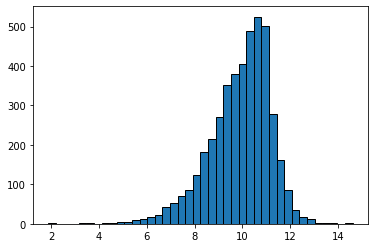

In [11]:
plt.hist(planets_tab['Hmag'],bins=40,edgecolor='black')
plt.show()

/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


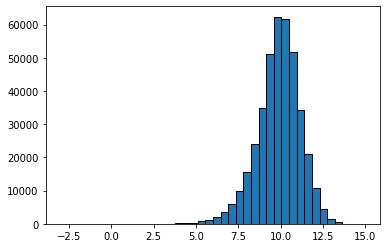

In [12]:
plt.hist(no_planets_tab['H'],bins=40,edgecolor='black')
plt.show()

## Plot All Targets

/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:93: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


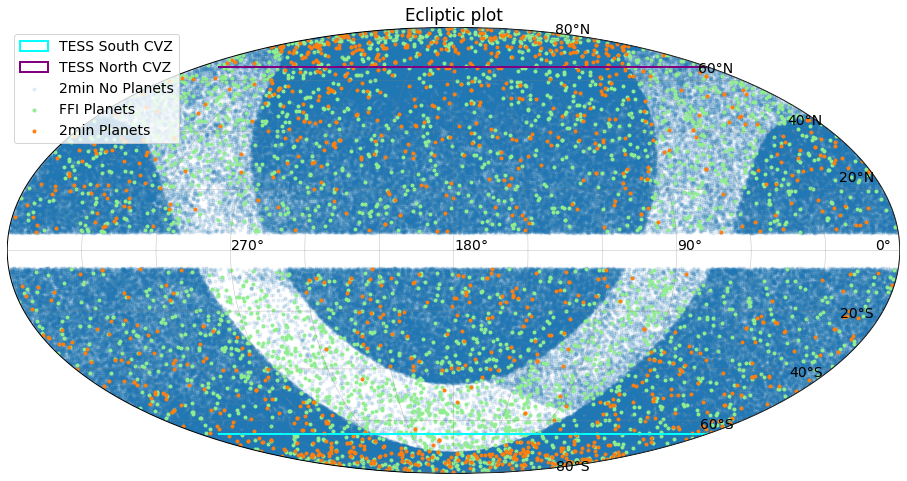

In [13]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_ecl()
#Plot Planet Targets
xnoplan,ynoplan = bmap(no_planets_tab['ECLONG'],no_planets_tab['ECLAT'])
bmap.scatter(xnoplan,ynoplan,marker='.',label='2min No Planets',alpha=.1)
xplan,yplan = bmap(planets_tab['ELON'][np.logical_not(planets_tab['2min-target'])]
                   ,planets_tab['ELAT'][np.logical_not(planets_tab['2min-target'])])
bmap.scatter(xplan,yplan,marker='.',color='lightgreen',label='FFI Planets',alpha=1)
xplan,yplan = bmap(planets_tab['ELON'][planets_tab['2min-target']],planets_tab['ELAT'][planets_tab['2min-target']])
bmap.scatter(xplan,yplan,marker='.',label='2min Planets',alpha=1)

plt.title("Ecliptic plot")
plt.legend()
plt.savefig('TESSplanets.jpg')
plt.show()

## Create Target Table

In [14]:
target_tab = Table()

## Determine Cadence type

In [15]:
(bins, edges) = np.histogram(planets_tab['Hmag'],bins=61,range=(9.475,12.525))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp = h2exp(mag_center,sn=80,exptime=15)
for i in np.arange(len(mag_center)):
    print("H Mag: {:.2f} Num Exp: {} Num Stars: {}".format(mag_center[i],numexp[i],bins[i]))

H Mag: 9.50 Num Exp: 1.0 Num Stars: 59
H Mag: 9.55 Num Exp: 1.0 Num Stars: 71
H Mag: 9.60 Num Exp: 1.0 Num Stars: 55
H Mag: 9.65 Num Exp: 1.0 Num Stars: 59
H Mag: 9.70 Num Exp: 1.0 Num Stars: 55
H Mag: 9.75 Num Exp: 1.0 Num Stars: 53
H Mag: 9.80 Num Exp: 1.0 Num Stars: 63
H Mag: 9.85 Num Exp: 1.0 Num Stars: 60
H Mag: 9.90 Num Exp: 1.0 Num Stars: 57
H Mag: 9.95 Num Exp: 1.0 Num Stars: 74
H Mag: 10.00 Num Exp: 1.0 Num Stars: 56
H Mag: 10.05 Num Exp: 1.0 Num Stars: 65
H Mag: 10.10 Num Exp: 1.0 Num Stars: 76
H Mag: 10.15 Num Exp: 1.0 Num Stars: 58
H Mag: 10.20 Num Exp: 1.0 Num Stars: 72
H Mag: 10.25 Num Exp: 1.0 Num Stars: 73
H Mag: 10.30 Num Exp: 1.0 Num Stars: 73
H Mag: 10.35 Num Exp: 1.0 Num Stars: 83
H Mag: 10.40 Num Exp: 1.0 Num Stars: 87
H Mag: 10.45 Num Exp: 2.0 Num Stars: 84
H Mag: 10.50 Num Exp: 2.0 Num Stars: 86
H Mag: 10.55 Num Exp: 2.0 Num Stars: 80
H Mag: 10.60 Num Exp: 2.0 Num Stars: 79
H Mag: 10.65 Num Exp: 2.0 Num Stars: 77
H Mag: 10.70 Num Exp: 2.0 Num Stars: 84
H Mag: 10.

In [16]:
(bins, edges) = np.histogram(no_planets_tab['H'],bins=61,range=(9.475,12.525))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp = h2exp(mag_center,sn=80,exptime=15)
for i in np.arange(len(mag_center)):
    print("H Mag: {:.2f} Num Exp: {} Num Stars: {}".format(mag_center[i],numexp[i],bins[i]))

H Mag: 9.50 Num Exp: 1.0 Num Stars: 6119
H Mag: 9.55 Num Exp: 1.0 Num Stars: 6362
H Mag: 9.60 Num Exp: 1.0 Num Stars: 6512
H Mag: 9.65 Num Exp: 1.0 Num Stars: 6574
H Mag: 9.70 Num Exp: 1.0 Num Stars: 6701
H Mag: 9.75 Num Exp: 1.0 Num Stars: 6922
H Mag: 9.80 Num Exp: 1.0 Num Stars: 6825
H Mag: 9.85 Num Exp: 1.0 Num Stars: 7019
H Mag: 9.90 Num Exp: 1.0 Num Stars: 7029
H Mag: 9.95 Num Exp: 1.0 Num Stars: 7204
H Mag: 10.00 Num Exp: 1.0 Num Stars: 7271
H Mag: 10.05 Num Exp: 1.0 Num Stars: 7066
H Mag: 10.10 Num Exp: 1.0 Num Stars: 7239
H Mag: 10.15 Num Exp: 1.0 Num Stars: 7227
H Mag: 10.20 Num Exp: 1.0 Num Stars: 7061
H Mag: 10.25 Num Exp: 1.0 Num Stars: 6941
H Mag: 10.30 Num Exp: 1.0 Num Stars: 7138
H Mag: 10.35 Num Exp: 1.0 Num Stars: 6744
H Mag: 10.40 Num Exp: 1.0 Num Stars: 6445
H Mag: 10.45 Num Exp: 2.0 Num Stars: 6375
H Mag: 10.50 Num Exp: 2.0 Num Stars: 6302
H Mag: 10.55 Num Exp: 2.0 Num Stars: 5952
H Mag: 10.60 Num Exp: 2.0 Num Stars: 6050
H Mag: 10.65 Num Exp: 2.0 Num Stars: 5863
H 

## I am going to do a cut at H<12.0 for the moment

In [17]:
sm_planets_tab = planets_tab[(planets_tab['Hmag'] < 12.0) & (planets_tab['Hmag'] > 7.0)]
sm_no_planets_tab = no_planets_tab[(no_planets_tab['H'] < 12.0) & (no_planets_tab['H'] > 7.0)]

/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


11.993
6961.0


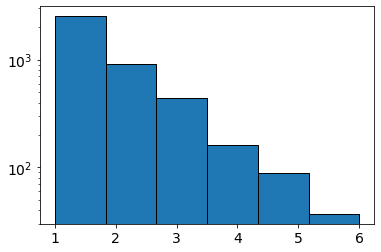

In [18]:
numexp = h2exp(sm_planets_tab['Hmag'],sn=80)
print(np.max(sm_planets_tab['Hmag']))
print(np.sum(numexp))
plt.hist(numexp,bins=6,log=True,edgecolor='black')
plt.show()

In [19]:
planets_cadence_list = ["mwm_planet_{:.0f}x1".format(num) for num in numexp]
print(planets_cadence_list[0:40])

['mwm_planet_1x1', 'mwm_planet_3x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_3x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_4x1']


11.999
605138.0


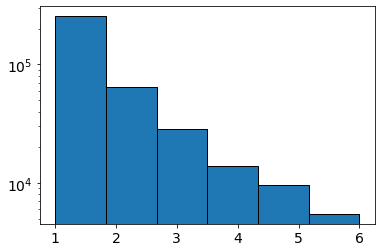

In [20]:
numexp = h2exp(sm_no_planets_tab['H'],sn=80)
print(np.max(sm_no_planets_tab['H']))
print(np.sum(numexp))
plt.hist(numexp,bins=6,log=True,edgecolor='black')
plt.show()

In [21]:
no_planets_cadence_list = ["mwm_planet_{:.0f}x1".format(num) for num in numexp]
print(no_planets_cadence_list[0:40])

['mwm_planet_4x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_3x1', 'mwm_planet_6x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_3x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_3x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_2x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_1x1', 'mwm_planet_4x1']


In [22]:
target_tab['ra'] = np.concatenate([sm_planets_tab['RAdeg'],sm_no_planets_tab['RA']*u.deg])
target_tab['dec'] = np.concatenate([sm_planets_tab['DEdeg'],sm_no_planets_tab['DEC']*u.deg])
target_tab['cadence'] = planets_cadence_list + no_planets_cadence_list
target_tab['type'] = np.concatenate([np.repeat('Planet',len(sm_planets_tab))
                                     ,np.repeat('No_Planet',len(sm_no_planets_tab))])

## Set priority
For 2min-target planets do priority 63, FFI planets 65, and no planets 68 

In [23]:
priority_arr = np.repeat(np.array(63,dtype='int32'),len(sm_planets_tab))
priority_arr[np.logical_not(sm_planets_tab['2min-target'])] = 65
target_tab['priority'] = np.concatenate([priority_arr,np.repeat(np.array(68,dtype='int32'),len(sm_no_planets_tab))])
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(sm_planets_tab)+len(sm_no_planets_tab))

In [24]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str14,str9,int32,float32
11.4122,-9.906003,mwm_planet_1x1,Planet,65,1.0
12.52727,-6.747038,mwm_planet_3x1,Planet,65,1.0
6.989876,-11.87873,mwm_planet_2x1,Planet,65,1.0
28.62281,64.79316,mwm_planet_1x1,Planet,65,1.0
7.307012,-43.12901,mwm_planet_1x1,Planet,65,1.0
7.612832,-46.18437,mwm_planet_1x1,Planet,63,1.0
19.8664,-27.56623,mwm_planet_1x1,Planet,65,1.0
19.96611,-28.80852,mwm_planet_1x1,Planet,63,1.0
22.244,-28.24533,mwm_planet_2x1,Planet,65,1.0


In [25]:
target_tab.write('{}/mwm_planet_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
The cadence I would like to use is using minimums
```
[[  0.  nan  nan  nan  nan  nan]
 [  0.   0.  nan  nan  nan  nan]
 [  0.   0.  0.  nan  nan  nan]
 [  0.   0.  0.   0.  nan  nan]
 [  0.   0.  0.   0.   0.  nan]
 [  0.   0.  0.   0.   0.   0.]]
```

In [26]:
cadence_tab = Table()

In [27]:
cadence_tab['cadence'] = np.array(['mwm_planet_1x1', 'mwm_planet_2x1','mwm_planet_3x1'
                                    ,'mwm_planet_4x1','mwm_planet_5x1', 'mwm_planet_6x1'])
cadence_tab['nepochs'] = np.array([1,2,3,4,5,6],dtype='int32')
delta = np.array([[0,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[0,2,np.nan,np.nan,np.nan,np.nan]
                ,[0,2,20,np.nan,np.nan,np.nan]
                ,[0,2,20,2,np.nan,np.nan]
                ,[0,2,20,2,2,np.nan]
                ,[0,2,20,2,2,2]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0. nan nan nan nan nan]
 [ 0.  2. nan nan nan nan]
 [ 0.  2. 20. nan nan nan]
 [ 0.  2. 20.  2. nan nan]
 [ 0.  2. 20.  2.  2. nan]
 [ 0.  2. 20.  2.  2.  2.]]


In [28]:
cadence_tab

cadence,nepochs,delta [6]
str14,int32,float32
mwm_planet_1x1,1,0.0 .. nan
mwm_planet_2x1,2,0.0 .. nan
mwm_planet_3x1,3,0.0 .. nan
mwm_planet_4x1,4,0.0 .. nan
mwm_planet_5x1,5,0.0 .. nan
mwm_planet_6x1,6,0.0 .. 2.0


In [29]:
delta_min = np.array([[0,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[0,0,np.nan,np.nan,np.nan,np.nan]
                ,[0,0,0,np.nan,np.nan,np.nan]
                ,[0,0,0,0,np.nan,np.nan]
                ,[0,0,0,0,0,np.nan]
                ,[0,0,0,0,0,0]],dtype='float32')

print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0. nan nan nan nan nan]
 [ 0.  0. nan nan nan nan]
 [ 0.  0.  0. nan nan nan]
 [ 0.  0.  0.  0. nan nan]
 [ 0.  0.  0.  0.  0. nan]
 [ 0.  0.  0.  0.  0.  0.]]


In [30]:
delta_max = np.array([[0,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[0,3000,np.nan,np.nan,np.nan,np.nan]
                ,[0,3000,3000,np.nan,np.nan,np.nan]
                ,[0,3000,3000,3000,np.nan,np.nan]
                ,[0,3000,3000,3000,3000,np.nan]
                ,[0,3000,3000,3000,3000,3000]],dtype='float32')

print(delta_max)
cadence_tab['delta_max'] = delta_max

[[   0.   nan   nan   nan   nan   nan]
 [   0. 3000.   nan   nan   nan   nan]
 [   0. 3000. 3000.   nan   nan   nan]
 [   0. 3000. 3000. 3000.   nan   nan]
 [   0. 3000. 3000. 3000. 3000.   nan]
 [   0. 3000. 3000. 3000. 3000. 3000.]]


In [31]:
lunation = np.array([[1,np.nan,np.nan,np.nan,np.nan,np.nan]
                ,[1,1,np.nan,np.nan,np.nan,np.nan]
                ,[1,1,1,np.nan,np.nan,np.nan]
                ,[1,1,1,1,np.nan,np.nan]
                ,[1,1,1,1,1,np.nan]
                ,[1,1,1,1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 1. nan nan nan nan nan]
 [ 1.  1. nan nan nan nan]
 [ 1.  1.  1. nan nan nan]
 [ 1.  1.  1.  1. nan nan]
 [ 1.  1.  1.  1.  1. nan]
 [ 1.  1.  1.  1.  1.  1.]]


In [32]:
instrument = np.array([['apogee',np.nan,np.nan,np.nan,np.nan,np.nan]
                ,['apogee','apogee',np.nan,np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee',np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee',np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee','apogee',np.nan]
                ,['apogee','apogee','apogee','apogee','apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee']]


In [33]:
cadence_tab

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
str14,int32,float32,float32,float32,float32,str6
mwm_planet_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_2x1,2,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_4x1,4,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_5x1,5,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_6x1,6,0.0 .. 2.0,0.0 .. 0.0,0.0 .. 3000.0,1.0 .. 1.0,apogee .. apogee


In [34]:
cadence_tab.write('{}/mwm_planet_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [35]:
test =  Table.read('{}/mwm_planet_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
bytes14,int32,float32,float32,float32,float32,bytes24
mwm_planet_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_2x1,2,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_4x1,4,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_5x1,5,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_planet_6x1,6,0.0 .. 2.0,0.0 .. 0.0,0.0 .. 3000.0,1.0 .. 1.0,apogee .. apogee
